## Imports

In [1]:
import sys
sys.path.append("../figures")

from where_chicago import WhereGrey, RetinaWhiten, TransformDico, ChicagoFacesDataset, WhatGender, WhatGenderTrainer, WhereRandomZoom, WhereZoom

In [2]:
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from main import init
args = init(filename='../data/2019-07-23')
args

{'w': 28,
 'minibatch_size': 10,
 'train_batch_size': 1000,
 'test_batch_size': 126,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 1718,
 'N_X': 1718,
 'N_Y': 2444,
 'N_X2': 98,
 'N_Y2': 140,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 48,
 'N_eccentricity': 24,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.5,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': 'adam',
 'bn1_bn_momentum': 0,
 'bn2_bn_momentum': 0,
 'momentum': 0,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 20,
 'verbose': 1,
 'filename': '../data/2019-07-23',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True,
 'zoomW': 300}

In [4]:
from retina_chicago import Retina
retina = Retina(args)

../tmp/retina_6_48_24_2_1.41_1718_dico.npy
Fichier retina_dico charge avec succes


## Chargement d'un dataset

In [5]:
dataset_train = ChicagoFacesDataset(args, use='train')

In [6]:
image = dataset_train[3][0]
print(image)
#image.show()

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [7]:
def WhereZoomEssai(fullfield, zoomW=None):
    fullfield_PIL = Image.fromarray(fullfield)
    use = 0
    if zoomW==None :
        use = 1
        taille_zoomW = args.zoomW # taille en pixels de l'image reduite # Width
    else :
        taille_zoomW = int(zoomW)
    ratio = args.N_X / args.N_Y
    taille_zoomH = int(ratio * taille_zoomW)
    image_reduite = fullfield_PIL.resize((taille_zoomW, taille_zoomH))
    WHITE = (255, 255, 255, 0)
    image_totale = Image.new('RGBA', (args.N_Y,args.N_X), WHITE)
    box = (int(args.N_Y//2 - taille_zoomW//2), int(args.N_X//2 - taille_zoomH//2), int(args.N_Y//2 + (taille_zoomW - taille_zoomW//2)), int(args.N_X//2 + (taille_zoomH - taille_zoomH//2)))
    image_totale.paste(image_reduite, box)
    image_totale = np.array(image_totale)
    if use == 1 : print("WhereZoom ok")
    return image_totale

In [8]:
def WhereRandomZoomEssai(fullfield):
    nb_diziemes = np.random.randint(1, 10)
    zoomW = nb_diziemes/10 * args.N_Y
    print("WhereRandomZoom ok")
    return WhereZoomEssai(fullfield, zoomW=zoomW), nb_diziemes

In [12]:
new_image, diziemes = WhereRandomZoomEssai(image)

WhereRandomZoom ok


In [13]:
new_image = np.array(new_image)

4


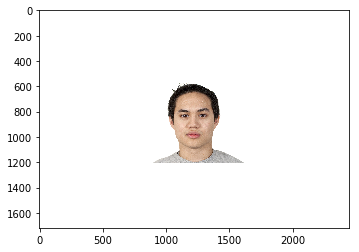

In [14]:
plt.imshow(new_image)
print(diziemes)

### Vérification fonctionnement usage basique

In [15]:
image2 = dataset_train[2][0]

In [16]:
image_resize = WhereZoomEssai(image2)

WhereZoom ok


In [17]:
image_resize = np.array(image_resize)

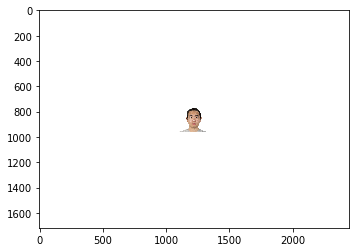

In [18]:
plt.imshow(image_resize)

## Une fois implémenté

In [5]:
args.minibatch_size = 10
args.train_batch_size = 100
args.test_batch_size = 50

In [6]:
transform = transforms.Compose([
                                WhereRandomZoom(args),
                                WhereGrey(args),
                                RetinaWhiten(args)
                            ])

In [7]:
dataset_train = ChicagoFacesDataset(args, use='train', transform=transform)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True
                                          )

In [9]:
batch_data_train, batch_label_train = next(iter(train_loader))

In [10]:
index_image = np.random.randint(10)
print(index_image)
image = batch_data_train[index_image]

5


In [11]:
print(len(image), image)

4198792 tensor([6.0742e-07, 6.0742e-07, 6.0741e-07,  ..., 6.0747e-07, 6.0746e-07,
        6.0745e-07], dtype=torch.float64)


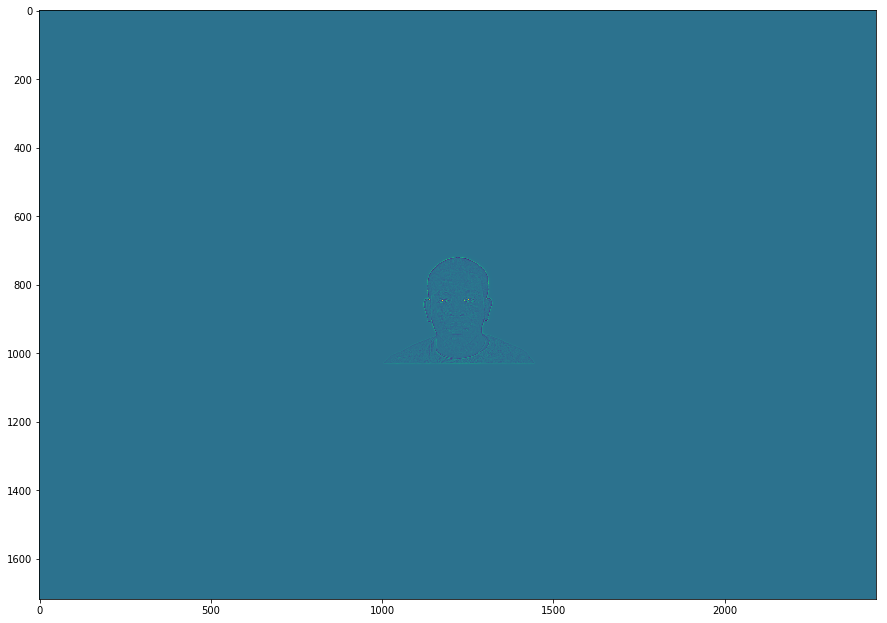

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(image[:].detach().numpy().reshape((1718, 2444)))

### Vérification WhereZoom tjrs fonctionnel

In [13]:
transform2 = transforms.Compose([
                                WhereZoom(args, 800),
                                WhereGrey(args),
                                RetinaWhiten(args)
                            ])

In [14]:
dataset_train2 = ChicagoFacesDataset(args, use='train', transform=transform2)

In [15]:
train_loader2 = torch.utils.data.DataLoader(dataset_train2,
                                         batch_size=args.minibatch_size,
                                         shuffle=True
                                          )

In [16]:
batch_data_train2, batch_label_train2 = next(iter(train_loader2))

In [17]:
index_image2 = np.random.randint(10)
print(index_image2)
image2 = batch_data_train2[index_image2]

5


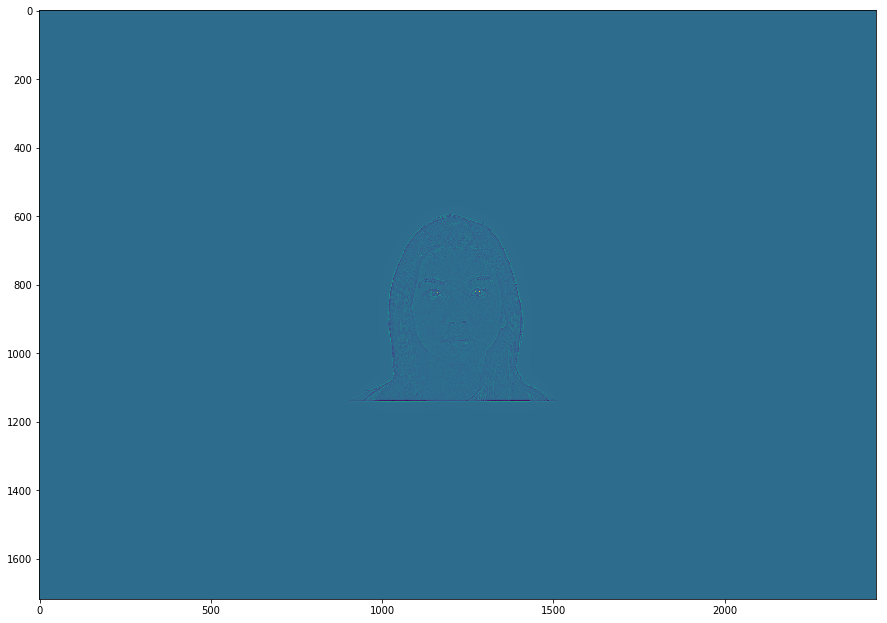

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(image2[:].detach().numpy().reshape((1718, 2444)))

## Entrainement d'un réseau avec TranformDico

In [5]:
# dans WhatGenderTrainer : (ou dans transform placé en argument)
#         transform = transforms.Compose([
#            WhereRandomZoom(args),
#            WhereGrey(args),
#            RetinaWhiten(args, resize=False), 
#            TransformDico(self.retina)])
# + décommenter self.bn1 = torch.nn.Linear(args.N_theta*args.N_azimuth*args.N_eccentricity*args.N_phase, args.dim1, bias=args.bias_deconv)
# dans WhatFacesNet
# + vérifier que fullfield = fullfield.flatten() est bien commenté dans RetinaWhiten

In [6]:
args.epochs = 60

In [7]:
train_loader_transformdico = torch.load("../tmp/train_loader_faces_2019-07-29_16h49.pt")

In [8]:
test_loader_transformdico = torch.load("../tmp/test_loader_faces_2019-07-29_17h01.pt")

In [9]:
if False : 
    what_gender_transformdico = WhatGender(args, retina, train_loader=train_loader_transformdico, test_loader=test_loader_transformdico)

../data/MNIST_cnn_what_gender_0.1_0.1_0.75_0.7_60epoques_2019-07-30_10h27.pt
Entrainement du modele en cours
Initialisation WhatTrainer
Chargement train_loader
Chargement test_loader
Calcul model
Epoque n.1
Train Epoch: 1/60 [0/1000 (0%)]	Loss: 0.701014
Train Epoch: 1/60 [200/1000 (20%)]	Loss: 4.037173
Train Epoch: 1/60 [400/1000 (40%)]	Loss: 4.317314
Train Epoch: 1/60 [600/1000 (60%)]	Loss: 2.376391
Train Epoch: 1/60 [800/1000 (80%)]	Loss: 1.025760

Test set: Average loss: 1.0614, Accuracy: 67/126 (53)%

Epoque n.2
Train Epoch: 2/60 [0/1000 (0%)]	Loss: 0.214207
Train Epoch: 2/60 [200/1000 (20%)]	Loss: 1.444640
Train Epoch: 2/60 [400/1000 (40%)]	Loss: 0.282454
Train Epoch: 2/60 [600/1000 (60%)]	Loss: 1.976283
Train Epoch: 2/60 [800/1000 (80%)]	Loss: 2.157280

Test set: Average loss: 0.8388, Accuracy: 69/126 (55)%

Epoque n.3
Train Epoch: 3/60 [0/1000 (0%)]	Loss: 0.455955
Train Epoch: 3/60 [200/1000 (20%)]	Loss: 1.736443
Train Epoch: 3/60 [400/1000 (40%)]	Loss: 1.062273
Train Epoch: 3/6

Train Epoch: 51/60 [600/1000 (60%)]	Loss: 0.546166
Train Epoch: 51/60 [800/1000 (80%)]	Loss: 0.551224

Test set: Average loss: 5.8027, Accuracy: 65/126 (52)%

Epoque n.52
Train Epoch: 52/60 [0/1000 (0%)]	Loss: 0.347393
Train Epoch: 52/60 [200/1000 (20%)]	Loss: 0.407324
Train Epoch: 52/60 [400/1000 (40%)]	Loss: 0.549164
Train Epoch: 52/60 [600/1000 (60%)]	Loss: 0.400469
Train Epoch: 52/60 [800/1000 (80%)]	Loss: 0.580542

Test set: Average loss: 7.3580, Accuracy: 66/126 (52)%

Epoque n.53
Train Epoch: 53/60 [0/1000 (0%)]	Loss: 0.555150
Train Epoch: 53/60 [200/1000 (20%)]	Loss: 0.628523
Train Epoch: 53/60 [400/1000 (40%)]	Loss: 0.279662
Train Epoch: 53/60 [600/1000 (60%)]	Loss: 0.559532
Train Epoch: 53/60 [800/1000 (80%)]	Loss: 0.482947

Test set: Average loss: 12.0728, Accuracy: 64/126 (51)%

Epoque n.54
Train Epoch: 54/60 [0/1000 (0%)]	Loss: 0.698733
Train Epoch: 54/60 [200/1000 (20%)]	Loss: 41.684750
Train Epoch: 54/60 [400/1000 (40%)]	Loss: 0.487079
Train Epoch: 54/60 [600/1000 (60%)]

In [5]:
what_gender_transformdico = torch.load("../data/MNIST_cnn_what_gender_0.1_0.1_0.75_0.7_60epoques_2019-07-30_10h27.pt")

C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'where_chicago.WhatFacesNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [12]:
list_acc_transformdico = [53, 55, 49, 62, 55, 55, 63, 54, 63, 52, 55, 47, 53, 56, 56, 57, 52, 59, 54, 60, 56, 55, 57, 59, 57, 55, 57, 60, 61, 60, 57, 61, 69, 57, 57, 56, 52, 58, 52, 53, 59, 53, 56, 57, 52, 53, 52, 53, 51, 53, 52, 52, 51, 52, 54, 51, 52, 51, 56, 55]

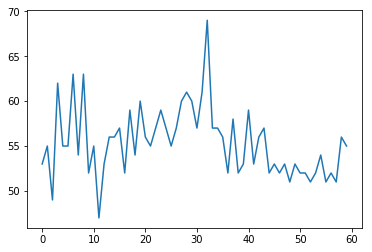

In [13]:
plt.plot(list_acc_transformdico)
plt.show()

## Entrainement d'un réseau avec Resize

In [5]:
# dans WhatGenderTrainer : (ou dans transform placé en argument)
#            WhereRandomZoom(args),
#            WhereGrey(args),
#            WhereResize(args),
#            RetinaWhiten(args, resize=True)
# + décomenter self.bn1 = torch.nn.Linear(args.N_X2*args.N_Y2, args.dim1, bias=args.bias_deconv) dans WhatFacesNet
# + décommenter fullfield = fullfield.flatten() dans RetinaWhiten

In [10]:
args.epochs = 60

In [11]:
train_loader_resize = torch.load("../tmp/train_loader_faces_2019-07-30_11h51.pt") # oubli flatten()

In [12]:
test_loader_resize = torch.load("../tmp/test_loader_faces_2019-07-30_11h51.pt") # oubli flatten()

In [14]:
if False :
    what_gender_resize = WhatGender(args, retina, train_loader=train_loader_resize, test_loader=test_loader_resize)

../data/MNIST_cnn_what_gender_0.1_0.1_0.75_0.7_60epoques_2019-07-30_11h56.pt
Entrainement du modele en cours
Initialisation WhatTrainer
Chargement train_loader
Chargement test_loader
Calcul model
Epoque n.1
Train Epoch: 1/60 [0/1000 (0%)]	Loss: 0.691560
Train Epoch: 1/60 [200/1000 (20%)]	Loss: 0.382317
Train Epoch: 1/60 [400/1000 (40%)]	Loss: 0.994584
Train Epoch: 1/60 [600/1000 (60%)]	Loss: 0.910038
Train Epoch: 1/60 [800/1000 (80%)]	Loss: 0.447294

Test set: Average loss: 0.6706, Accuracy: 82/126 (65)%

Epoque n.2
Train Epoch: 2/60 [0/1000 (0%)]	Loss: 0.525243
Train Epoch: 2/60 [200/1000 (20%)]	Loss: 0.269245
Train Epoch: 2/60 [400/1000 (40%)]	Loss: 0.576207
Train Epoch: 2/60 [600/1000 (60%)]	Loss: 0.179864
Train Epoch: 2/60 [800/1000 (80%)]	Loss: 1.193992

Test set: Average loss: 0.7246, Accuracy: 89/126 (71)%

Epoque n.3
Train Epoch: 3/60 [0/1000 (0%)]	Loss: 0.266565
Train Epoch: 3/60 [200/1000 (20%)]	Loss: 0.662629
Train Epoch: 3/60 [400/1000 (40%)]	Loss: 0.047738
Train Epoch: 3/6

Train Epoch: 51/60 [400/1000 (40%)]	Loss: 0.000000
Train Epoch: 51/60 [600/1000 (60%)]	Loss: 0.003031
Train Epoch: 51/60 [800/1000 (80%)]	Loss: 0.000000

Test set: Average loss: 18.6650, Accuracy: 99/126 (79)%

Epoque n.52
Train Epoch: 52/60 [0/1000 (0%)]	Loss: 0.000000
Train Epoch: 52/60 [200/1000 (20%)]	Loss: 0.000011
Train Epoch: 52/60 [400/1000 (40%)]	Loss: 0.000000
Train Epoch: 52/60 [600/1000 (60%)]	Loss: 0.000082
Train Epoch: 52/60 [800/1000 (80%)]	Loss: 0.000000

Test set: Average loss: 17.9282, Accuracy: 102/126 (81)%

Epoque n.53
Train Epoch: 53/60 [0/1000 (0%)]	Loss: 0.000000
Train Epoch: 53/60 [200/1000 (20%)]	Loss: 0.000203
Train Epoch: 53/60 [400/1000 (40%)]	Loss: 0.000000
Train Epoch: 53/60 [600/1000 (60%)]	Loss: 0.000012
Train Epoch: 53/60 [800/1000 (80%)]	Loss: 0.000000

Test set: Average loss: 20.1862, Accuracy: 100/126 (79)%

Epoque n.54
Train Epoch: 54/60 [0/1000 (0%)]	Loss: 0.000000
Train Epoch: 54/60 [200/1000 (20%)]	Loss: 0.000000
Train Epoch: 54/60 [400/1000 (40

In [17]:
what_gender_resize = torch.load("../data/MNIST_cnn_what_gender_0.1_0.1_0.75_0.7_60epoques_2019-07-30_11h56.pt")

In [18]:
list_acc_resize = [65.07936507936508, 70.63492063492063, 69.04761904761905, 66.66666666666667, 73.01587301587301, 79.36507936507937, 78.57142857142857, 76.98412698412699, 75.39682539682539, 75.39682539682539, 76.98412698412699, 74.60317460317461, 75.39682539682539, 70.63492063492063, 73.01587301587301, 75.39682539682539, 76.98412698412699, 67.46031746031746, 72.22222222222223, 73.80952380952381, 73.01587301587301, 78.57142857142857, 80.15873015873017, 75.39682539682539, 79.36507936507937, 76.19047619047619, 77.77777777777777, 79.36507936507937, 80.95238095238095, 76.19047619047619, 79.36507936507937, 77.77777777777777, 80.95238095238095, 77.77777777777777, 80.15873015873017, 79.36507936507937, 78.57142857142857, 80.15873015873017, 79.36507936507937, 78.57142857142857, 79.36507936507937, 80.15873015873017, 76.98412698412699, 83.33333333333333, 79.36507936507937, 79.36507936507937, 80.15873015873017, 78.57142857142857, 81.74603174603175, 77.77777777777777, 78.57142857142857, 80.95238095238095, 79.36507936507937, 79.36507936507937, 78.57142857142857, 80.15873015873017, 78.57142857142857, 82.53968253968254, 80.15873015873017, 79.36507936507937]

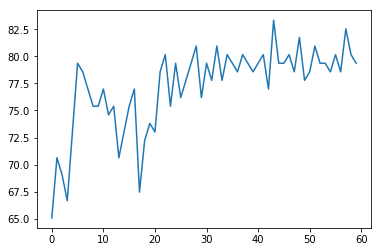

In [20]:
plt.plot(list_acc_resize)
plt.show()